## 회귀(regression)
- 머신러닝에서의 회귀 방법의 목적 : 연속된 실숫값을 정확히 예측하는 것
- 3장의 AND, OR, XOR 신경망이 출력을 정확하게 예측한 것도 회귀의 일종

## 선형 회귀(linear regression)
- 2개의 데이터에 대한 경향성 예측

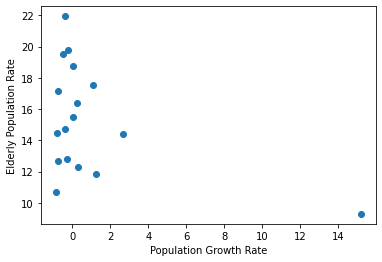

In [1]:
# 2018년 지역별 인구증가율, 고령인구비율
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
import matplotlib.pyplot as plt
plt.plot(population_inc, population_old, 'o')  # 점 그래프 그리기
plt.xlabel("Population Growth Rate")
plt.ylabel("Elderly Population Rate")
plt.show()

In [2]:
# 맨 오른쪽 밑 부분에 치우친 하나의 점
# 극단치(outlier)
# 일반적인 경향에서 벗어남
# 데이터의 일반적인 경향을 파악하기 위해 극단치 제거

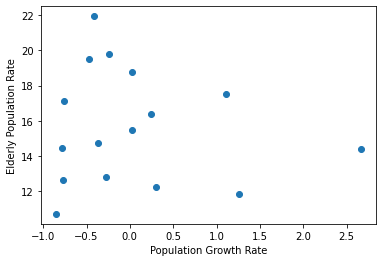

In [3]:
# 극단치 제거한 자료
import matplotlib.pyplot as plt
population_inc = population_inc[:5] + population_inc[6:]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc, population_old, 'o')
plt.xlabel("Population Growth Rate")
plt.ylabel("Elderly Population Rate")
plt.show()
# 원래 데이터의 맨 오른쪽 아래의 극단치를 제거한 나머지 자료들의 산점도 그림이다.

In [4]:
# 선형 회귀
# 최소제곱법(Least Square Methond) : 잔차의 제곱을 최소화하는 알고리즘
# 잔차 : 선형식 - 데이터 (즉, 차이)

In [5]:
# X, Y의 평균 구하기
X = population_inc
Y = population_old
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

In [6]:
# 최소제곱법 사용하여 회귀계수 a, b 구하기
# Y = aX + b
# i = 1 ~ n까지의 Sxx, Sxy 총합을 구해야 하니까 list comprehension 사용
Sxy = sum([(x - x_bar)*(y - y_bar) for x, y in list(zip(X, Y))])  # 2개 이상의 리스트를 하나로 묶을 땐 : zip 사용
Sxx = sum([(x - x_bar)**2 for x in X])
a = Sxy / Sxx
b = y_bar - a * x_bar
print("a:", a, "b:", b)

a: -0.355834147915461 b: 15.669317743971302


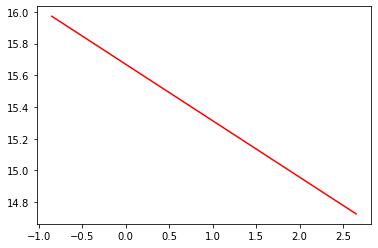

In [7]:
# 회귀선의 x축 데이터, y축 데이터 정리
# x축 데이터 : 원래 데이터의 최솟값 ~ 최댓값(0.01간격)
# y축 데이터 : 예측값(회귀선 따라서)
import numpy as np
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b
# 빨간선으로 회귀선 그리기
plt.plot(line_x, line_y, "r-")
plt.show()
# 회귀선에서의 데이터의 경향 : x값이 증가 -> y값은 감소
# 즉, 인구증가율 증가 -> 고령인구비율 감소
# 두 변수는 음의 상관관계에 있다.

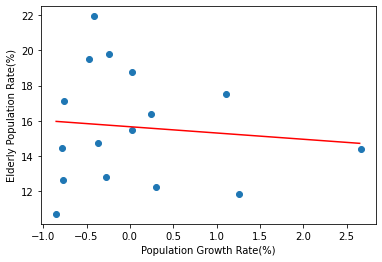

In [8]:
# 원래 데이터와 회귀선 같이 그리기
plt.plot(X, Y, "o")
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Population Rate(%)")
plt.plot(line_x, line_y, "r-")

plt.show()

In [9]:
# 지금까지는 최소제곱법 공식을 이용해서
# 회귀식을 일일히 구했다.
# 이번에는 tensorflow를 이용해서 회귀식을 구해보자.

## Tensorflow Linear Regression(텐서플로우 선형 회귀분석)
$$
y = ax + b
$$

- Cost Function(=Loss Function) : 비용함수, 손실함수
    - 실제 데이터, 회귀직선 사이의 오차
    - ex) MSE(잔차제곱의 합)

- Gradient Descent Algorithm(경사하강법 알고리즘)
    - 목적 :Cost Function을 최소로 만들자.
    - 미분해서 구하므로 미분가능한 함수여야 한다.
    - 데이터셋 값들을 반복 적용 -> a, b 파라미터를 더 정확하게 찾음
    - lr : 학습률 : 각 반복때마다 얼마나 크게 이동할 것인가
        - 너무 커버리면 : 최소값을 지나칠 수 있음
        - 너무 작아버리면 : 최소값에 다다르는데 오랜 시간(오랜 반복)이 필요


- 참조 : https://tensorflow.blog/2-텐서플로우-선형-회귀분석-first-contact-with-tensorflow/

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
X = population_inc
Y = population_old

# a, b를 난수로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
print(a.numpy(), b.numpy())

0.23867212 0.97694796


In [12]:
# 잔차의 제곱(SSE)의 평균(MSE)
def MSE():
    y_pred = a * X + b # 회귀선 위의 y hat
    mse = tf.reduce_mean((Y - y_pred) ** 2)
    return mse

# 위의 참조 링크에서는 경사하강법 사용
# 여기서는 Adam 옵티마이저 이용
# 다른 최적화 함수(optimizer)보다 Adam 의 성능이 뛰어나다.
# 가장 손실이 낮다.
optimizer = tf.optimizers.Adam(lr = 0.07)  # 학습률 : lr - 0.07
# 보통 학습률 : 0.0001 ~ 0.1 사이의 값을 사용

for i in range(1000):  # 학습 횟수 : 1000번
    # SSE를 최소화(minimize)
    optimizer.minimize(MSE, var_list=[a,b])
    # optimizer.minimize(최소화할 손실, var_list=학습시킬 변수 리스트)
    
    if i % 100 == 99:
        print(i, "a:", a.numpy(), "b:", b.numpy(), "loss:", MSE().numpy())

99 a: 0.088491894 b: 7.324784 loss: 79.250534
199 a: -0.14412671 b: 11.686898 loss: 25.60368
299 a: -0.27324066 b: 14.115557 loss: 12.189377
399 a: -0.32986885 b: 15.180851 loss: 10.01885
499 a: -0.34928972 b: 15.5462 loss: 9.795927
599 a: -0.35451886 b: 15.644574 loss: 9.781414
699 a: -0.35562533 b: 15.665392 loss: 9.780819
799 a: -0.35580832 b: 15.668834 loss: 9.780804
899 a: -0.35583165 b: 15.669271 loss: 9.780802
999 a: -0.3558332 b: 15.669303 loss: 9.780804


In [13]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 회귀선 위의 점 (line_x, line_y)

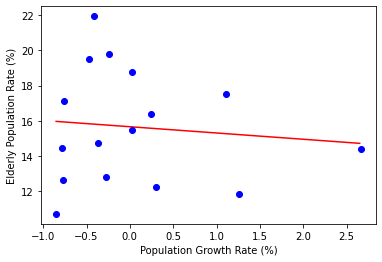

In [14]:
plt.plot(line_x, line_y, 'r-')  # 회귀선 : 빨강색 실선
plt.plot(X, Y, 'bo')  # 원래 데이터 : 파랑색 점
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

## 비선형 회귀
- 선형 회귀로는 표현할 수 없는 데이터의 경향성을 설명하기 위한 회귀

## 다항 회귀
- $x^2, x^3$ 등의 다항식 이용
- 직선 대신 2차, 3차 함수 등의 곡선

In [15]:
# 4.5 Tensorflow 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

2차 함수 회귀선
$$
y=ax^2 + bx + c
$$

In [16]:
X = population_inc
Y = population_old

In [17]:
# (X,Y) 출력해보자
print(list(zip(X,Y)))

[(0.3, 12.27), (-0.78, 14.44), (1.26, 11.87), (0.03, 18.75), (1.11, 17.52), (0.24, 16.37), (-0.24, 19.78), (-0.47, 19.51), (-0.77, 12.65), (-0.37, 14.74), (-0.85, 10.72), (-0.41, 21.94), (-0.27, 12.83), (0.02, 15.51), (-0.76, 17.14), (2.66, 14.42)]


In [18]:
# 회귀계수 a, b, c를 난수로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

In [19]:
# MSE 함수 정의
def MSE():
    y_pred = a * X*X + b * X + c
    mse = tf.reduce_mean((Y-y_pred)**2)
    return mse

In [20]:
# Adam 알고리즘에 의한 손실 함수 최소화
optimizer = tf.keras.optimizers.Adam(lr = 0.07)
for i in range(1000):  # 학습 횟수 : 1000번
    optimizer.minimize(MSE, var_list = [a, b, c])
    # MSE를 최소화하자.
    # 학습시킬 변수 리스트 : 회귀계수 a, b, c의 리스트
    
    # 학습 1000번의 결과를 다 출력할 순 없으니까
    if i % 100 == 99:
        print(f"{i}번째 학습 결과, a: {a.numpy()}, b: {b.numpy()}, c: {c.numpy()}, loss:, {MSE().numpy()}")

99번째 학습 결과, a: 3.930072546005249, b: -5.696630001068115, c: 6.5263352394104, loss:, 67.82276153564453
199번째 학습 결과, a: 2.8127052783966064, b: -4.566290855407715, c: 10.29696273803711, loss:, 31.546409606933594
299번째 학습 결과, a: 1.3015305995941162, b: -2.3155407905578613, c: 12.906500816345215, loss:, 16.15365982055664
399번째 학습 결과, a: 0.33984988927841187, b: -0.8764752745628357, c: 14.549603462219238, loss:, 11.032787322998047
499번째 학습 결과, a: -0.1780281811952591, b: -0.10189294070005417, c: 15.436452865600586, loss:, 9.744294166564941
599번째 학습 결과, a: -0.4191344380378723, b: 0.25869473814964294, c: 15.849516868591309, loss:, 9.496932983398438
699번째 학습 결과, a: -0.5165255665779114, b: 0.4043460488319397, c: 16.016380310058594, loss:, 9.460573196411133
799번째 학습 결과, a: -0.5507073998451233, b: 0.4554668664932251, c: 16.074947357177734, loss:, 9.456483840942383
899번째 학습 결과, a: -0.5611229538917542, b: 0.4710431396961212, c: 16.092792510986328, loss:, 9.456135749816895
999번째 학습 결과, a: -0.56386882066

In [21]:
# 출력 결과를 보니
# 손실함수가 70.24 -> 9.46으로 많이 감소한 것을 알 수 있다.

In [22]:
# 이제 원래 데이터의 산점도,
# 학습을 통해 구한 2차 회귀식의 그림을 그려보자.

In [23]:
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x*line_x + b * line_x + c

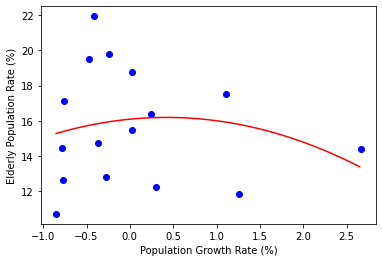

In [24]:
plt.plot(X, Y, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

In [25]:
# 아까 구한 1차 회귀선의 학습 999번째의 loss = 9.780804
# 이번에 구한 2차 회귀선의 학습 999번재의 loss = 9.456110000610352
# 2차 회귀선의 손실 함수값이 더 작다.

In [26]:
# 이번에는 3차 회귀선을 구해보자.

3차 회귀선
$$
y = ax^3 + bx^2 + cx + d
$$

In [27]:
# 4.6 Tensorflow 3차 회귀선 구하기
# 필요한 라이브러리 import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
# 원본 데이터
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

In [29]:
# 회귀계수 난수로 초기화
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

In [30]:
# MSE
def MSE():
    y_pred = a * X*X*X + b * X*X + c * X + d
    mse = tf.reduce_mean((Y - y_pred)**2)
    return mse

In [31]:
# Adam algorithm을 이용한 손실함수 최소화
optimizer = tf.keras.optimizers.Adam(lr = 0.07)

for i in range(1000):
    optimizer.minimize(MSE, var_list = [a, b, c, d])
    
    if i % 100 == 99:
        print(f"{i}번째 학습 결과, a: {a.numpy()}, b: {b.numpy()}, c: {c.numpy()}, d: {d.numpy()}, loss:, {MSE().numpy()}")

99번째 학습 결과, a: -0.6010422110557556, b: 4.574393272399902, c: -4.290714740753174, d: 6.404544830322266, loss:, 66.07730102539062
199번째 학습 결과, a: -1.5237176418304443, b: 5.778466701507568, c: -2.7118353843688965, d: 10.07310676574707, loss:, 29.796703338623047
299번째 학습 결과, a: -1.512821078300476, b: 4.727502822875977, c: -1.0483667850494385, d: 12.244987487792969, loss:, 19.266387939453125
399번째 학습 결과, a: -0.9831382036209106, b: 2.893829345703125, c: -0.49758854508399963, d: 13.65576457977295, loss:, 14.230599403381348
499번째 학습 결과, a: -0.36421412229537964, b: 1.0647073984146118, c: -0.3791254460811615, d: 14.677423477172852, loss:, 11.229456901550293
599번째 학습 결과, a: 0.16870954632759094, b: -0.45917609333992004, c: -0.36236992478370667, d: 15.453801155090332, loss:, 9.535701751708984
699번째 학습 결과, a: 0.5776178240776062, b: -1.6206562519073486, c: -0.36240988969802856, d: 16.03339195251465, loss:, 8.669296264648438
799번째 학습 결과, a: 0.8709847331047058, b: -2.4529542922973633, c: -0.36405923962

In [32]:
# 3차 회귀선
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

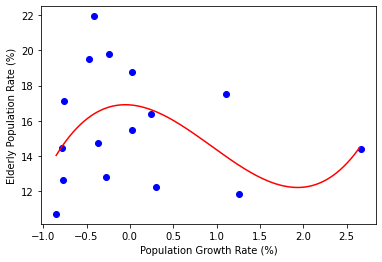

In [33]:
# 그래프 그리기
plt.plot(X, Y, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

In [34]:
# 3차 회귀선이 데이터를 잘 설명한다고 보기 어렵다.
# 이번에 구한 3차 회귀선의 학습 999번재의 loss = 8.023063659667969
# 3차 회귀선의 손실함수값이 제일 작게 나왔다.

In [35]:
# 3장의 AND, OR, XOR 연산을 하는 신경망 네트워크처럼 keras로도 딥러닝 신경망 네트워크를 만들 수 있다.

In [36]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 6,  # 레이어를 구성할 뉴런의 수  # 뉴런의 수가 많을수록 딥러닝 네트워크의 표현력이 좋아진다.
                                                                 # 하지만, 너무 많으면 학습이 제대로 안되거나, 과적합이 될 수 있음.
                         activation = "tanh",  # 사용할 활성화 함수
                         input_shape = (1,)),  # 형태 정보
    tf.keras.layers.Dense(units = 1)  # 레이어를 구성할 뉴런의 수  # x 입력값에 대한 하나의 y값만을 출력
])

In [37]:
model.compile(optimizer = tf.keras.optimizers.SGD(lr = 0.1),
             loss = "mse")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 4.7의 딥러닝 model
# 2개의 Dense layer로 구성
# 첫번째 Dense 레이어 - 활성화함수 : tanh -> 입력값 : 실수 / 출력값 : -1 ~ 1
#                    - 레이어를 구성할 뉴런의 수 : 6개
#                       - 뉴런이 많을수록 딥러닝 네트워크의 표현력이 좋아지지만, 너무 많으면 학습이 제대로 안되거나 과적합이 될 수 있음.
# 두번째 Dense 레이어 - 레이어를 구성할 뉴런의 수 : 1개
#                       - x 입력값에 대한 1개의 y값만을 출력해야하므로

# optimizer - loss : mse(평균제곱오차)

In [39]:
model.fit(X, Y, epochs = 10)  # 학습 수 : 10번

Epoch 1/10
1/1 [==============================] - 0s 1000us/step - loss: 256.4910
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 112.1062
Epoch 3/10
1/1 [==============================] - 0s 998us/step - loss: 10.0997
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 9.7116
Epoch 5/10
1/1 [==============================] - 0s 998us/step - loss: 9.6816
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6742
Epoch 7/10
1/1 [==============================] - 0s 997us/step - loss: 9.6689
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6637
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 9.6580
Epoch 10/10
1/1 [==============================] - 0s 998us/step - loss: 9.6517


In [40]:
model.fit(X, Y, epochs = 1000)  # 학습 수 : 1000번

Epoch 1/1000
1/1 [==============================] - 0s 998us/step - loss: 9.6447
Epoch 2/1000
1/1 [==============================] - 0s 998us/step - loss: 9.6367
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.6275
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.6169
Epoch 5/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.6045
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.5899
Epoch 7/1000
1/1 [==============================] - 0s 998us/step - loss: 9.5725
Epoch 8/1000
1/1 [==============================] - 0s 998us/step - loss: 9.5515
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 9.5259
Epoch 10/1000
1/1 [==============================] - 0s 997us/step - loss: 9.4944
Epoch 11/1000
1/1 [==============================] - 0s 998us/step - loss: 9.4553
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 9.4064
Epoch 13/1000
1/1 [==================

In [41]:
# 손실함수값이 6.3 근방이다.
# 손실에 거의 변화가 없으면 -> 학습이 거의 다 된 것이다.

In [42]:
# 딥러닝을 포함한 머신러닝에서는 충분히 학습 -> 학습 종료
# 그렇지 않으면, 학습데이터에 과적합
# 현재 데이터의 경향성은 지나치게 잘 반영
# 그러나, 새로운 데이터에는 잘 안 맞을 수 있음

# 학습을 언제 멈출지 결정하는 데 좋은 판단 기준 : 학습 데이터 / 검증 데이터를 설정하는 것

In [43]:
model.predict(X)

array([[14.874771],
       [12.914354],
       [14.319136],
       [15.738447],
       [14.338884],
       [15.011765],
       [17.133621],
       [18.1424  ],
       [13.330923],
       [17.776037],
       [10.711588],
       [17.94187 ],
       [17.291769],
       [15.783106],
       [13.759251],
       [14.162159]], dtype=float32)

In [44]:
# 학습이 끝나면
# 입력값을 입력했을 때 딥러닝 네트워크가 어떤 값을 예측하는 지 확인해야 한다.

# 거의 15 부근의 값을 출력하는 것처럼 보인다.
# 학습이 잘 된 것인지 확인하는 법 -> 그래프를 그려본다.

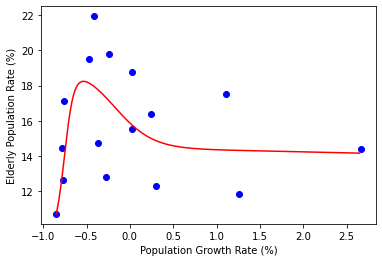

In [45]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(X, Y, 'bo')
plt.plot(line_x, line_y, 'r-')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Elderly Population Rate (%)")
plt.show()

In [46]:
# 딥러닝 네트워크를 이용해 회귀선을 예측한 그래프를 보고
# 직접 회귀계수를 추정한 1,2,3차 회귀선 중 어느 그래프와 제일 비슷하게 생겼는 지 유추 가능

---
## 보스턴 주택 가격 데이터셋

In [47]:
# 딥러닝 네트워크를 이용한 회귀
# 보스턴 주택 가격 데이터셋을 이용 -> 주택 가격 예측 네트워크를 만들어보자.

In [48]:
# data 정보
# 참조 : https://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset
# 보스턴 주택 가격 데이터셋
# 1978년 미국 보스턴 지역의 주택 가격
# X : 범죄율, 주택당 방 갯수, 고속도로까지의 거리 등 13가지 데이터
# Y : 506개 타운의 주택 가격 중앙값

In [49]:
from tensorflow.keras.datasets import boston_housing

In [50]:
boston_housing

<module 'tensorflow.keras.datasets.boston_housing' from 'C:\\Users\\geunho\\AppData\\Roaming\\Python\\Python37\\site-packages\\tensorflow\\keras\\datasets\\boston_housing\\__init__.py'>

In [51]:
boston_housing.load_data()  # 데이터셋을 불러온다.

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

## 데이터셋 분할
참조 : https://wikidocs.net/60021


<img src='https://wikidocs.net/images/page/24987/%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG'>
보통 훈련 : 검증 : 테스트 데이터 = 60 : 20 : 20




1. 훈련 데이터
    - 학습 과정에 사용
    - 유일하게 딥러닝 네트워크의 가중치에 영향을 주는 데이터
2. 검증 데이터
    - 훈련 데이터에서 일부 떼냄
    - 학습이 잘되고 있는지 검증하는데 사용
    - model의 성능을 조정하기 위한 용도(과적합 판단/하이퍼파라미터 조정)
3. 테스트 데이터
    - 학습 결과를 평가
    - 최종 평가에 사용

### 머신러닝 과정
-> 학습 데이터로 훈련 

-> 검증 데이터로 정확도 검증 & 하이퍼파라미터 튜닝 

-> 테스트 데이터로 모델의 진자 성능 평가

ex) 훈련 데이터(문제지), 검증 데이터(모의고사), 테스트 데이터(수능)

### 매개변수, 하이퍼파라미터
- 매개변수
    - model이 학습하는 과정에서 얻어지는 값
    - ex) 가중치(w), 편향(b)
- 하이퍼파라미터(hyperparameter, 초매개변수)
    - 사용자가 직접 정해주는 변수
    - 값에 따라 모델의 성능에 영향을 주는 매개변수
    - ex) 학습률(lr), 은닉층의 수, 뉴런의 수, dropout 비율

In [52]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [53]:
print(len(train_X), len(test_X))
# 훈련 데이터 : 404개
# 테스트 데이터 : 102개
# 훈련 데이터 : 테스트 데이터 = 80:20 정도
print(train_X[0])
print(len(train_X[0]))
# 변수의 갯수 : 13개
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
13
15.2


훈련 데이터의 일부를 떼서 검증 데이터로 만들어야 한다.

- 훈련 : 검증 : 테스트 데이터 = 60 : 20 : 20 (보통 이정도)

근데 보스턴 주택 가격 데이터셋의 변수들의 단위가 다르다.

실생활 데이터 : 다양한 단위를 가지고 있는 경우가 많다.

데이터 전처리 -> 정규화해야지 학습 효율이 좋다.

- 정규화
$$
\frac{X - mean(X)}{std(X)}
$$

데이터의 분포 -> 표준정규분포로 변환

1. 훈련 데이터의 평균, 표준편차 구하기 -> 훈련 데이터 정규화
2. 훈련 데이터의 평균, 표준편차로 -> 테스트 데이터도 정규화
    - 이유 : 테스트 데이터는 따로 정규화하면 안 됨.
    - 테스트 데이터는 데이터 학습을 마친 후 모델 최종 평가에 사용되는 야생의 데이터이기 때문에 어떤 분포를 띨지 알 수 없음!

In [54]:
x_mean = train_X.mean(axis=0)  # axis=0 기준. 변수 기준
x_std = train_X.std(axis=0)

train_X  = (train_X - x_mean) / x_std  # 훈련 데이터의 평균, 표준편차로
test_X = (test_X - x_mean) / x_std     # 훈련 데이터와 테스트 데이터 정규화

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)

train_Y = (train_Y - y_mean) / y_std
test_Y = (test_Y - y_mean) / y_std

In [55]:
print(train_X[0])
print(train_Y[0])
# 정규화가 제대로 되었으면
# 0 ~ 1 사이의 값을 가진다.

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [56]:
# 데이터 전처리 결과
# 표준정규분포로 바뀌었다.
# 이제 이 전처리 완료된 데이터로 딥러닝 네트워크를 학습시키자.
# tensorflow의 keras의 Sequential을 이용하자.

In [57]:
# model 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52,            # 레이어를 구성할 뉴런의 수 
                         activation = "relu",    # 활성화 함수 종류                   # ReLU 알고리즘
                         input_shape = (13,)),   # 형태 정보(입력값의 갯수(bias포함))  # 변수 13개
    tf.keras.layers.Dense(units = 39,
                         activation = "relu"),
    tf.keras.layers.Dense(units = 26,
                         activation = "relu"),
    tf.keras.layers.Dense(units = 1)             # 출력값 y 1개
])

In [58]:
# model compile
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.07),
             loss = "mse")
model.summary()
# param 갯수 = units수(layer 구성 뉴런의 갯수) * (input_dim(입력값의 갯수)+1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [59]:
# 앞의 인구증가율과 고령인구비율 데이터보다 속성(변수)의 갯수 많음, 데이터의 양 많음
# -> layer갯수 4개로 증가, 각 layer의 뉴런의 수 증가

# layer갯수, 은닉층의 뉴런수 증가 -> 모델의 표현력 좋아짐, 더 복잡한 내용 학습 가능

In [60]:
# 활성화함수로 ReLU 사용
# ReLU : y=x 함수의 음수 부분을 정류해서 0으로 만든 것
# 지금처럼 여러 개의 layer를 겹쳐서 사용할 때, sigmoid 함수나 tanh 함수보다 좋은 결과를 얻을 수 있음.

In [61]:
# model 정의 끝

In [62]:
# 이제 회귀 모델 학습시키자.
history = model.fit(train_X, train_Y,
                   epochs = 25,
                   batch_size = 32,
                   validation_split = 0.25)  # 훈련데이터의 25% 정도를 검증데이터로 (전체 데이터의 20%)

Epoch 1/25
10/10 [==============================] - 0s 17ms/step - loss: 3.1592 - val_loss: 1.4006
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.5627 - val_loss: 0.7182
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3997 - val_loss: 0.9102
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3855 - val_loss: 0.8904
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.4077 - val_loss: 0.3961
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2154 - val_loss: 0.3290
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1980 - val_loss: 0.3929
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2057 - val_loss: 0.3681
Epoch 9/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1789 - val_loss: 0.3250
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1668 - val_loss: 0.3622
Epoch 11/25
10/10 

## 학습과정 표시
- 참조 : https://tykimos.github.io/2017/07/09/Training_Monitoring/
- 로그에 포함된 수치 : 학습이 제대로 되고 있는지, 그만할지 등 판단하는 데 중요한 척도가 됨.
- 값보다 epoch마다 변화하는 변화 추이가 중요
- 그래프 표시 직관적


### history 기능 이용하기
- model.fit()에 담겨있음.
- 담고 있는 정보
    - loss : 매 epoch마다 훈련 데이터의 손실함수값
    - acc : 매 epoch마다 훈련 정확도
    - val_loss : 매 epoch마다 검증 데이터의 손실함수값
    - val_acc : 매 epoch마다 검증 정확도

```python
history = model.fit(train_X, train_Y, 
                    epochs=1000,
                    batch_size = 10,
                    validation_data = (X_val, Y_val))

print(history.history["loss"])
print(history.history["acc"])
print(history.history["val_loss"])
print(history.history["val_acc"])
```



In [63]:
# 출력 결과를 보니
# loss(훈련 데이터 손실값)은 전체적으로 감소한다.
# 그러나, val_loss(검증 데이터 손실값)은 loss보다 높은 값을 가지고, 항상 감소하지는 않는다.

# 한눈에 알아보기 어렵다..
# 그래프로 시각화해보자.

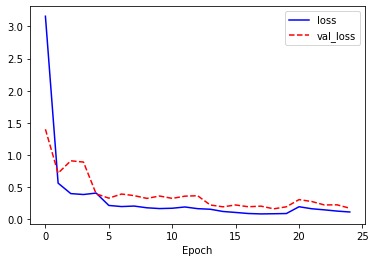

In [64]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], "b-", label = "loss")
plt.plot(history.history["val_loss"], "r--", label = "val_loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [65]:
# 파랑색 실선 : loss : 훈련 데이터 손실값
# 빨강색 점선 : val_loss : 검증 데이터 손실값

# 훈련 데이터 손실값은 비교적 꾸준히 감소한다.
# 검증 데이터의 손실값은 전체적으로 봐서는 감소하지만,
# 중간 중간, 증가되는 모습을 볼 수 있다.

In [66]:
# 테스트 데이터를 이용해서 회귀 모델을 평가해보자.
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.1889


0.18887871503829956

In [67]:
# 테스트 데이터의 손실값 : loss : 0.1916
# 모델이 잘 적합된 것 같다.

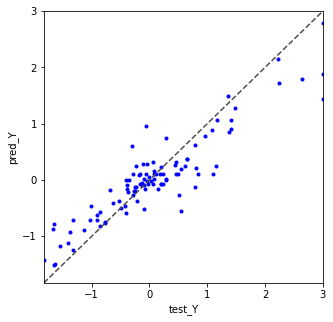

In [68]:
# 이제 네트워크가 y값을 얼마나 잘 예측하는지 확인해보자.

# 실제 주택 가격, 예측 주택 가격을 비교해보자.
# x축 : 실제 주택 가격
# y축 : 예측 주택 가격

# 만일 산점도 그림이 y=x의 직선과 가깝다면 예측을 잘 한 것이다.

import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)  # 예측 주택 가격

# 시각화 : (test_Y, pred_Y)
plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, "b.")  # 예측 주택 가격 : 산점도
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# 비교할 수 있게 
# y=x(대각선)을 그려보자.
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")

plt.xlabel("test_Y")
plt.ylabel("pred_Y")
plt.show()

In [69]:
# 실제 주택 가격(test_Y)에 대해서 예측 주택 가격(pred_Y)은 전체적으로 비슷한 모습을 보이지만
# 일부 눈에 띄게 떨어진 값들도 보임

# 이렇게 약간의 차이가 나는 것을 줄이려면?
# 훈련 데이터, 검증 데이터, 테스트 데이터 중에서
# 훈련 데이터만 네트워크의 가중치에 영향을 미친다.
# 검증 데이터가 훈련 데이터에서 일부 떼어낸 것이긴 하지만, 테스트 데이터와 마찬가지로 네트워크의 가중치에 영향을 미치진 않는다.
# -> 검증 데이터의 손실값이 감소한다면 -> 테스트 데이터의 손실값도 감소할 것이다.
# -> 테스트 데이터에 대한 정확도가 올라간다.

In [70]:
# 즉, 검증 데이터에 대한 정확도가 올라가게 하려면
# val_loss가 증가하지 않도록.
# 학습이 진행될동안 점차 감소하도록 해줘야 한다.

In [71]:
# 네트워크가 훈련 데이터에 과적합되지 않도록
# 학습 중간에 끼어들어서 학습을 멈춰줘야 한다.
# 학습 도중에 끼어들 때 : callback(콜백) 함수 사용

### 콜백(callback) 함수
- 네트워크가 훈련 데이터에 과적합이 되지 않도록 막아주는 역할
- 검증 데이터의 손실값(val_loss)이 증가하기 전에 막아준다.
- 참조 : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

In [72]:
# 4.18 모델 재정의 & 학습
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52,
                         activation="relu",
                         input_shape=(13,)),
    tf.keras.layers.Dense(units=39,
                         activation="relu"),
    tf.keras.layers.Dense(units=26,
                         activation="relu"),
    tf.keras.layers.Dense(units=1)
])

# 모델 compile
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
             loss="mse")

# 모델 학습, 학습 기록
history = model.fit(train_X, train_Y,
                   epochs=25,
                   batch_size=32,
                   validation_split=0.25,
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3,             # callback 함수는 fit할 때 파라미터로 들어간다.
                                                              monitor="val_loss")])

Epoch 1/25
10/10 [==============================] - 0s 13ms/step - loss: 4.0686 - val_loss: 0.6190
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3490 - val_loss: 0.4428
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.3041 - val_loss: 0.3028
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2126 - val_loss: 0.3605
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1700 - val_loss: 0.2617
Epoch 6/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1517 - val_loss: 0.2071
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1419 - val_loss: 0.2375
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1514 - val_loss: 0.1930
Epoch 9/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1367 - val_loss: 0.2519
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1228 - val_loss: 0.2463
Epoch 11/25
10/10 

In [73]:
# callback(콜백) 함수 중 EarlyStopping 사용
# patience : 몇 번의 epoch를 기준으로 할 것인가
# monitor : 어떤 값을 지켜볼 것인가

# patience=3, monitor="val_loss" -> 3회의 epoch를 수행하는 동안 val_loss 값이 여태껏 나온 최소값보다 작은 수가 나오지 않는다면(감소하지 않고 중간에 증가하면)
# -> 학습 중단
# 시키는 callback 함수이다.

In [74]:
# 위의 history 로그를 보면
# 13회 학습이 이루어졌을 때, 그 전까지 나온 가장 최소값인 0.3130보다 더 작은 값이 나오지 않고
# 큰 값인 0.3876이 나왔기 때문에
# callback 함수가 학습을 중단시킨 것이다.

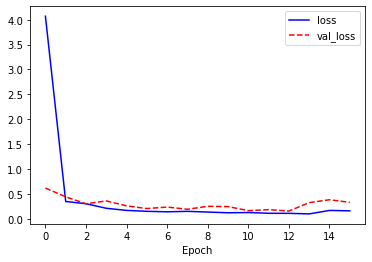

In [75]:
# 이제 callback 함수를 이용해서
# 훈련데이터에 과적합이 되지 않도록 학습시킨 결과는 어떨지 시각화 해보자.
# 4.19 회귀 모델의 학습 결과 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')

plt.xlabel("Epoch")
plt.legend()
plt.show()

In [76]:
# 위의 callback 함수를 적용하기 전의 그림에서는
# 25회 학습를 하는 과정에서 val_loss의 값이 중간에 증가하는 부분이 눈에 띄게 보였지만,

# 이번에 callback 함수를 적용한 후의 그림을 보니
# loss 의 값은 급격하게 감소한 후, 꾸준히 감소하는 모습.
# val_loss 의 값은 살짝 감소한 후, 꾸준히 감소하는 모습으로 보인다.

# 검증 데이터의 손실에서 뚜렷한 증가세가 보이지 않는다!

In [77]:
# callback 함수가 사용된 model 평가
model.evaluate(test_X, test_Y)  # 테스트 데이터로 평가

4/4 [==============================] - 0s 2ms/step - loss: 0.1462


0.14616622030735016

In [78]:
# callback 함수를 사용하지 않은 모델의 테스트 데이터에 대한 손실값보다
# 지금 callback 함수를 사용한 모델의 테스트 데이터에 대한 손실값이 약간 더 작다.

# 네트워크의 목적 : 손실값 감소
# -> 지금 모델의 학습이 더 잘 되었다고 할 수 있다.

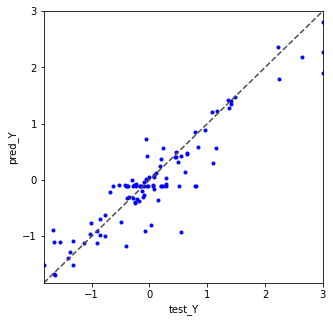

In [79]:
# 이번에는 아까와 마찬가지로
# 실제 주택 가격(test_Y), 예측 주택 가격(pred_Y)을 1:1로 시각화해보자.

import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel("test_Y")
plt.ylabel("pred_Y")
plt.show()

In [80]:
# callback 함수를 사용하지 않은 모델의 실제 주택 가격과 예측 주택 가격의 산점도 그림과 비교해서 보면,
# 결과값의 분산이 작아졌다. (점들이 직선 근처에 위치한다.)

# 이렇게 callback 함수로 EarlyStopping 을 사용하면 네트워크가 과적합되지 않도록 도중에 학습을 멈출 수 있다.